In [ ]:
# Lightgbm stands for Light gradient boosting Framework
#Ensemble learning Technique
# Goss( Gradient one sided sampling)
# Feature bundling
import pandas as pd
data=pd.read_csv("/content/SVMtrain.csv")
data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [ ]:
#Step2:  Imported all the required libraries
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#step3:
x = data.drop(['Embarked','PassengerId','Sex'],axis=1)
print(x)

     Survived  Pclass   Age  SibSp  Parch     Fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
884         0       2  27.0      0      0  13.0000
885         1       1  19.0      0      0  30.0000
886         0       3  60.0      1      2  23.4500
887         1       1  26.0      0      0  30.0000
888         0       3  32.0      0      0   7.7500

[889 rows x 6 columns]


In [ ]:
#use case: THE THREE DIFFERENT STATES(CHENNAI,Kerala and Mangalore-Embarked )
# you are analyzing Embarked with other parameters using LGBM

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
y = data.Embarked
y


,Embarked
0,3
1,1
2,3
3,3
4,3
...,...
884,3
885,3
886,3
887,1


In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)


In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=5,random_state=42)
model.fit(x_train,y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 6
[LightGBM] [Info] Start training from score -1.688081
[LightGBM] [Info] Start training from score -2.418269
[LightGBM] [Info] Start training from score -0.320136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=42)

In [ ]:
#step5: # read the train and test dataset
train_data = x_train,y_train
test_data = x_test,y_test
train_data
test_data


(     Survived  Pclass   Age  SibSp  Parch      Fare
 280         0       3  28.0      0      0    7.8542
 434         1       1  14.0      1      2  120.0000
 39          1       3  14.0      1      0   11.2417
 417         0       2  30.0      0      0   13.0000
 584         1       1  18.0      0      2   79.6500
 ..        ...     ...   ...    ...    ...       ...
 710         0       1  60.0      0      0   26.5500
 838         0       3  20.0      0      0    7.9250
 380         1       3   1.0      0      2   15.7417
 140         1       3  22.0      0      0    7.7500
 173         0       1  56.0      0      0   30.6958
 
 [294 rows x 6 columns],
 280    3
 434    3
 39     1
 417    3
 584    3
       ..
 710    3
 838    3
 380    1
 140    3
 173    1
 Name: Embarked, Length: 294, dtype: int64)

In [42]:
print('Training accuracy{:.4f} '.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))
# excelent model
#dictionary}{key :value}


Training accuracy0.9429 
Testing accuracy 0.8129


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

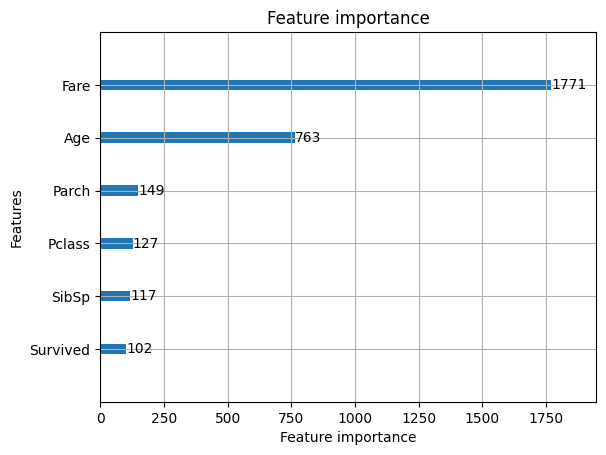

In [ ]:
lgb.plot_importance(model)
# decreasing order